### Notebook Purpose

Display a grid of knee slices so Akshay can identify the ones which are clinically interesting

In [17]:
import os, sys
import numpy as np
from os import listdir
from os.path import isfile, join
import h5py
import matplotlib.pyplot as plt

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.transform import recon_ksp_to_img

In [20]:
path = '/bmrNAS/people/dvv/multicoil_val/'
file_list = [f for f in listdir(path) if isfile(join(path, f))]
file_list.sort()

NUM_FILES = 1
NUM_SLICES = 25

for file in file_list[:NUM_FILES]:
    
    file_id = file.split('file')[1].split('.h5')[0]
    
    f = h5py.File(path + file, 'r')
    slice_mid = f['kspace'].shape[0] // 2
    idx_lo, idx_hi = slice_mid - (NUM_SLICES // 2), slice_mid + NUM_SLICES // 2
    vol_ksp = f['kspace'][idx_lo:idx_hi]
    
    vol_img = []
    for slice_ksp in vol_ksp:    
        vol_img.append(recon_ksp_to_img(slice_ksp))
    vol_img = np.array(vol_img)  
    
    fig = plt.figure(figsize=(40, 40))

    for idx, img in enumerate(vol_img):

        ax = fig.add_subplot(6, 4, idx+1)
        ax.imshow(img, cmap='gray')
        ax.set_title('{}: {}'.format(file_id, idx), fontsize=36)
        ax.axis('off')
        plt.tight_layout()
        plt.savefig('slice_grid/slice_grid_fileid_{}.pdf'.format(file_id), format='pdf')

(24, 15, 640, 368)


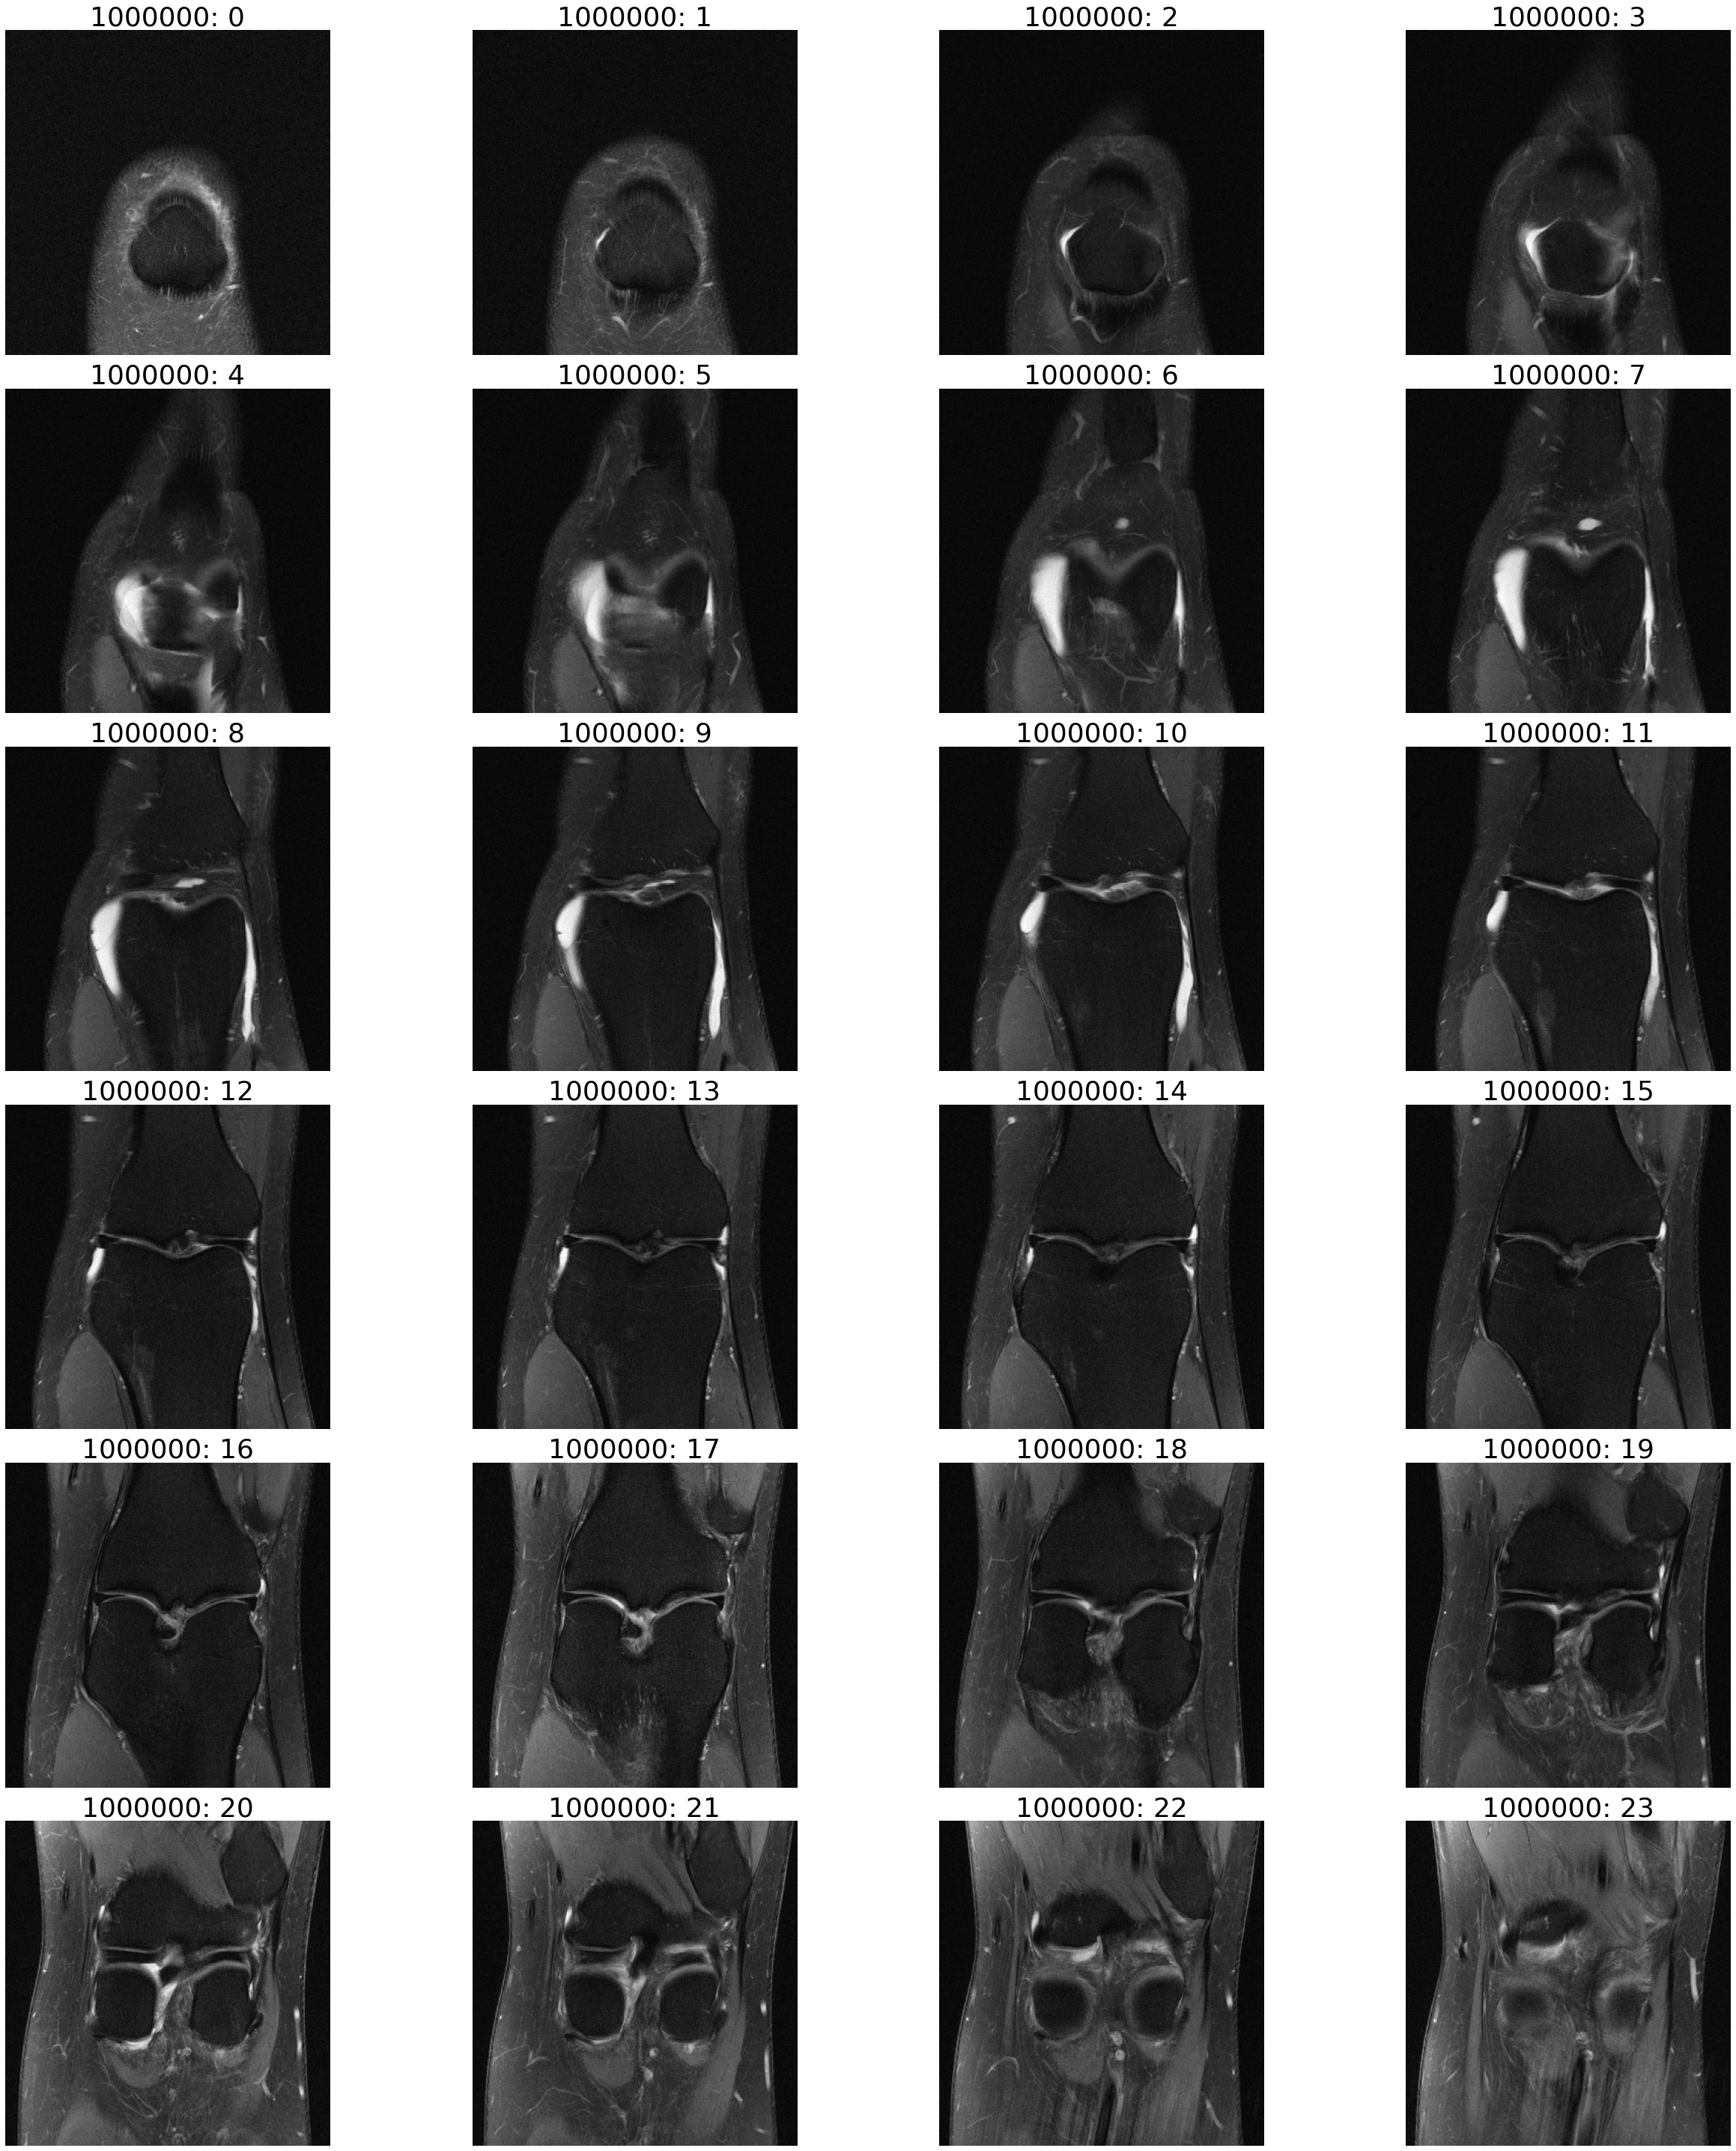